# Purpose of Week 1
Get to know EDA (Exploratory Data Analysis)
- `Pandas` for data loading, data cleaning 
- `matplotlib`, `seaborn` for data visualization
- Feature Engineering for tabular data

## Excercise

We have a dataset that includes almost **features of houses**. The goal is to predict the **sales price** of each house.
At the first week, we try to understand the dataset and get some insights.
Note that understanding data is the first and also the most important of an AI project. So have fun with this :)

## Load libraries and data

In [1]:
import numpy as np
import pandas as pd

import seaborn as sns
import matplotlib.pyplot as plt

from sklearn.preprocessing import StandardScaler
from sklearn.preprocessing import OneHotEncoder,OrdinalEncoder

import warnings
warnings.filterwarnings('ignore')

1. Oops, no module named ...? Please fix this.

2. Ok, let's load the dataset to Pandas's dataframes:

In [2]:
df_train = pd.read_csv('./data/train.csv')
df_test = pd.read_csv('./data/test.csv')

Let's see the data

In [3]:
pd.set_option('display.max_columns', None)
df_train.head()

,Id,MSSubClass,MSZoning,LotFrontage,LotArea,Street,Alley,LotShape,LandContour,Utilities,LotConfig,LandSlope,Neighborhood,Condition1,Condition2,BldgType,HouseStyle,OverallQual,OverallCond,YearBuilt,YearRemodAdd,RoofStyle,RoofMatl,Exterior1st,Exterior2nd,MasVnrType,MasVnrArea,ExterQual,ExterCond,Foundation,BsmtQual,BsmtCond,BsmtExposure,BsmtFinType1,BsmtFinSF1,BsmtFinType2,BsmtFinSF2,BsmtUnfSF,TotalBsmtSF,Heating,HeatingQC,CentralAir,Electrical,1stFlrSF,2ndFlrSF,LowQualFinSF,GrLivArea,BsmtFullBath,BsmtHalfBath,FullBath,HalfBath,BedroomAbvGr,KitchenAbvGr,KitchenQual,TotRmsAbvGrd,Functional,Fireplaces,FireplaceQu,GarageType,GarageYrBlt,GarageFinish,GarageCars,GarageArea,GarageQual,GarageCond,PavedDrive,WoodDeckSF,OpenPorchSF,EnclosedPorch,3SsnPorch,ScreenPorch,PoolArea,PoolQC,Fence,MiscFeature,MiscVal,MoSold,YrSold,SaleType,SaleCondition,SalePrice
0,1,60,RL,65.0,8450,Pave,NaN,Reg,Lvl,AllPub,Inside,Gtl,CollgCr,Norm,Norm,1Fam,2Story,7,5,2003,2003,Gable,CompShg,VinylSd,VinylSd,BrkFace,196.0,Gd,TA,PConc,Gd,TA,No,GLQ,706,Unf,0,150,856,GasA,Ex,Y,SBrkr,856,854,0,1710,1,0,2,1,3,1,Gd,8,Typ,0,NaN,Attchd,2003.0,RFn,2,548,TA,TA,Y,0,61,0,0,0,0,NaN,NaN,NaN,0,2,2008,WD,Normal,208500
1,2,20,RL,80.0,9600,Pave,NaN,Reg,Lvl,AllPub,FR2,Gtl,Veenker,Feedr,Norm,1Fam,1Story,6,8,1976,1976,Gable,CompShg,MetalSd,MetalSd,None,0.0,TA,TA,CBlock,Gd,TA,Gd,ALQ,978,Unf,0,284,1262,GasA,Ex,Y,SBrkr,1262,0,0,1262,0,1,2,0,3,1,TA,6,Typ,1,TA,Attchd,1976.0,RFn,2,460,TA,TA,Y,298,0,0,0,0,0,NaN,NaN,NaN,0,5,2007,WD,Normal,181500
2,3,60,RL,68.0,11250,Pave,NaN,IR1,Lvl,AllPub,Inside,Gtl,CollgCr,Norm,Norm,1Fam,2Story,7,5,2001,2002,Gable,CompShg,VinylSd,VinylSd,BrkFace,162.0,Gd,TA,PConc,Gd,TA,Mn,GLQ,486,Unf,0,434,920,GasA,Ex,Y,SBrkr,920,866,0,1786,1,0,2,1,3,1,Gd,6,Typ,1,TA,Attchd,2001.0,RFn,2,608,TA,TA,Y,0,42,0,0,0,0,NaN,NaN,NaN,0,9,2008,WD,Normal,223500
3,4,70,RL,60.0,9550,Pave,NaN,IR1,Lvl,AllPub,Corner,Gtl,Crawfor,Norm,Norm,1Fam,2Story,7,5,1915,1970,Gable,CompShg,Wd Sdng,Wd Shng,None,0.0,TA,TA,BrkTil,TA,Gd,No,ALQ,216,Unf,0,540,756,GasA,Gd,Y,SBrkr,961,756,0,1717,1,0,1,0,3,1,Gd,7,Typ,1,Gd,Detchd,1998.0,Unf,3,642,TA,TA,Y,0,35,272,0,0,0,NaN,NaN,NaN,0,2,2006,WD,Abnorml,140000
4,5,60,RL,84.0,14260,Pave,NaN,IR1,Lvl,AllPub,FR2,Gtl,NoRidge,Norm,Norm,1Fam,2Story,8,5,2000,2000,Gable,CompShg,VinylSd,VinylSd,BrkFace,350.0,Gd,TA,PConc,Gd,TA,Av,GLQ,655,Unf,0,490,1145,GasA,Ex,Y,SBrkr,1145,1053,0,2198,1,0,2,1,4,1,Gd,9,Typ,1,TA,Attchd,2000.0,RFn,3,836,TA,TA,Y,192,84,0,0,0,0,NaN,NaN,NaN,0,12,2008,WD,Normal,250000


### Data Exploration
Let's try to answer all questions below (with source code and graphs if needed).

3. Check types of each column

In [4]:
df_train.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 1460 entries, 0 to 1459
Data columns (total 81 columns):
 #   Column         Non-Null Count  Dtype  
---  ------         --------------  -----  
 0   Id             1460 non-null   int64  
 1   MSSubClass     1460 non-null   int64  
 2   MSZoning       1460 non-null   object 
 3   LotFrontage    1201 non-null   float64
 4   LotArea        1460 non-null   int64  
 5   Street         1460 non-null   object 
 6   Alley          91 non-null     object 
 7   LotShape       1460 non-null   object 
 8   LandContour    1460 non-null   object 
 9   Utilities      1460 non-null   object 
 10  LotConfig      1460 non-null   object 
 11  LandSlope      1460 non-null   object 
 12  Neighborhood   1460 non-null   object 
 13  Condition1     1460 non-null   object 
 14  Condition2     1460 non-null   object 
 15  BldgType       1460 non-null   object 
 16  HouseStyle     1460 non-null   object 
 17  OverallQual    1460 non-null   int64  
 18  OverallC

4. How many columns (features), rows of this dataset?

In [5]:
print(df_train.shape[1],"columns")
print(df_train.shape[0],"rows")

81 columns
1460 rows


5. How many numerical features, time features, discrete features, continuous features, categoricals features? Find basic statistics (min, max, mean, standard deviation) of each features.

In [6]:
numerical_features = []
time_features = ['YearBuilt','YearRemodAdd','GarageYrBlt','MoSold','YrSold']
discrete_features = []
continuous_features = []
categoricals_features = []
for i in df_train:
    if(df_train[i].dtype == 'object'):
        categoricals_features.append(i)
    else :            
        if(df_train[i].dtype == 'float64' and i != 'LotFrontage' and i != 'GarageYrBlt'):
            continuous_features.append(i)
        else :
            discrete_features.append(i)
        numerical_features.append(i)
print('numerical_features:',len(numerical_features))
print('time_features:',len(time_features))
print('discrete_features:',len(discrete_features))
print('continuous_features:',len(continuous_features))
print('categoricals_features:',len(categoricals_features))

numerical_features: 38
time_features: 5
discrete_features: 37
continuous_features: 1
categoricals_features: 43


In [7]:
df_train.describe().T

,count,mean,std,min,25%,50%,75%,max
Id,1460.0,730.500000,421.610009,1.0,365.75,730.5,1095.25,1460.0
MSSubClass,1460.0,56.897260,42.300571,20.0,20.00,50.0,70.00,190.0
LotFrontage,1201.0,70.049958,24.284752,21.0,59.00,69.0,80.00,313.0
LotArea,1460.0,10516.828082,9981.264932,1300.0,7553.50,9478.5,11601.50,215245.0
OverallQual,1460.0,6.099315,1.382997,1.0,5.00,6.0,7.00,10.0
OverallCond,1460.0,5.575342,1.112799,1.0,5.00,5.0,6.00,9.0
YearBuilt,1460.0,1971.267808,30.202904,1872.0,1954.00,1973.0,2000.00,2010.0
YearRemodAdd,1460.0,1984.865753,20.645407,1950.0,1967.00,1994.0,2004.00,2010.0
MasVnrArea,1452.0,103.685262,181.066207,0.0,0.00,0.0,166.00,1600.0
BsmtFinSF1,1460.0,443.639726,456.098091,0.0,0.00,383.5,712.25,5644.0


6. How many duplicated rows?

In [8]:
print('duplicated rows: ', len(df_train)-len(df_train.drop_duplicates()))

duplicated rows:  0


7. How many missing values of each feature?

In [9]:
for i in df_train:
    print("missing values of",i,":",df_train[i].isna().sum())

missing values of Id : 0
missing values of MSSubClass : 0
missing values of MSZoning : 0
missing values of LotFrontage : 259
missing values of LotArea : 0
missing values of Street : 0
missing values of Alley : 1369
missing values of LotShape : 0
missing values of LandContour : 0
missing values of Utilities : 0
missing values of LotConfig : 0
missing values of LandSlope : 0
missing values of Neighborhood : 0
missing values of Condition1 : 0
missing values of Condition2 : 0
missing values of BldgType : 0
missing values of HouseStyle : 0
missing values of OverallQual : 0
missing values of OverallCond : 0
missing values of YearBuilt : 0
missing values of YearRemodAdd : 0
missing values of RoofStyle : 0
missing values of RoofMatl : 0
missing values of Exterior1st : 0
missing values of Exterior2nd : 0
missing values of MasVnrType : 8
missing values of MasVnrArea : 8
missing values of ExterQual : 0
missing values of ExterCond : 0
missing values of Foundation : 0
missing values of BsmtQual : 3

8. Count unique values of each feature

In [10]:
for i in df_train:
    print("unique values of",i,":",pd.DataFrame(df_train[i].unique()).count()[0])

unique values of Id : 1460
unique values of MSSubClass : 15
unique values of MSZoning : 5
unique values of LotFrontage : 110
unique values of LotArea : 1073
unique values of Street : 2
unique values of Alley : 2
unique values of LotShape : 4
unique values of LandContour : 4
unique values of Utilities : 2
unique values of LotConfig : 5
unique values of LandSlope : 3
unique values of Neighborhood : 25
unique values of Condition1 : 9
unique values of Condition2 : 8
unique values of BldgType : 5
unique values of HouseStyle : 8
unique values of OverallQual : 10
unique values of OverallCond : 9
unique values of YearBuilt : 112
unique values of YearRemodAdd : 61
unique values of RoofStyle : 6
unique values of RoofMatl : 8
unique values of Exterior1st : 15
unique values of Exterior2nd : 16
unique values of MasVnrType : 4
unique values of MasVnrArea : 327
unique values of ExterQual : 4
unique values of ExterCond : 5
unique values of Foundation : 6
unique values of BsmtQual : 4
unique values of 

9. Plot the distribution of sale price (target). Also check sale price distribution in log scale. Any insights?

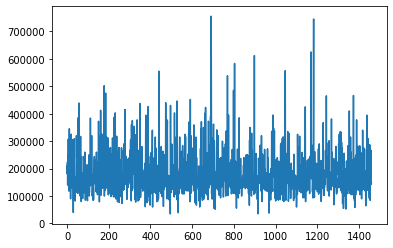

In [11]:
plt.plot(df_train['SalePrice'])

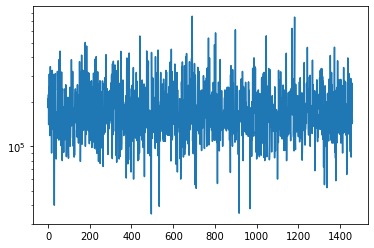

In [12]:
plt.plot(df_train['SalePrice'])
plt.yscale('log')

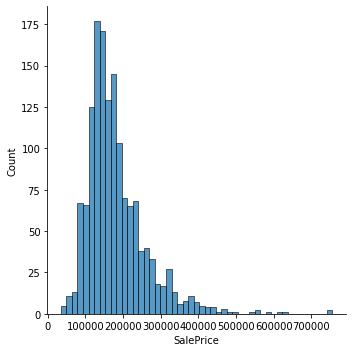

In [13]:
sns.displot(df_train['SalePrice'])

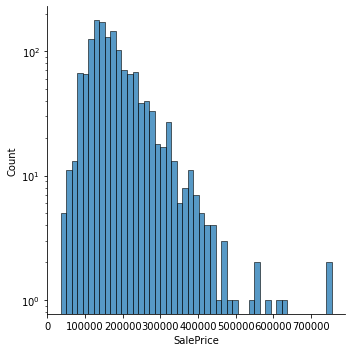

In [14]:
sns.displot(df_train['SalePrice'])
plt.yscale('log')

- Sale Price are mainly from 100,000 to 300,000

10. Check correlation of each feature to target. Which features are the most important? Any insights? 

In [15]:
df_train.corrwith(df_train["SalePrice"]).sort_values()

KitchenAbvGr    -0.135907
EnclosedPorch   -0.128578
MSSubClass      -0.084284
OverallCond     -0.077856
YrSold          -0.028923
LowQualFinSF    -0.025606
Id              -0.021917
MiscVal         -0.021190
BsmtHalfBath    -0.016844
BsmtFinSF2      -0.011378
3SsnPorch        0.044584
MoSold           0.046432
PoolArea         0.092404
ScreenPorch      0.111447
BedroomAbvGr     0.168213
BsmtUnfSF        0.214479
BsmtFullBath     0.227122
LotArea          0.263843
HalfBath         0.284108
OpenPorchSF      0.315856
2ndFlrSF         0.319334
WoodDeckSF       0.324413
LotFrontage      0.351799
BsmtFinSF1       0.386420
Fireplaces       0.466929
MasVnrArea       0.477493
GarageYrBlt      0.486362
YearRemodAdd     0.507101
YearBuilt        0.522897
TotRmsAbvGrd     0.533723
FullBath         0.560664
1stFlrSF         0.605852
TotalBsmtSF      0.613581
GarageArea       0.623431
GarageCars       0.640409
GrLivArea        0.708624
OverallQual      0.790982
SalePrice        1.000000
dtype: float

In [16]:
print("feature is the most important: OverallQual")

feature is the most important: OverallQual


- High sale prices are affected by Rates the overall material, the finish of the house, the area of the garage, and Original construction date 

11. Check correlations of numerical features to each others. Any insights?

<AxesSubplot:>

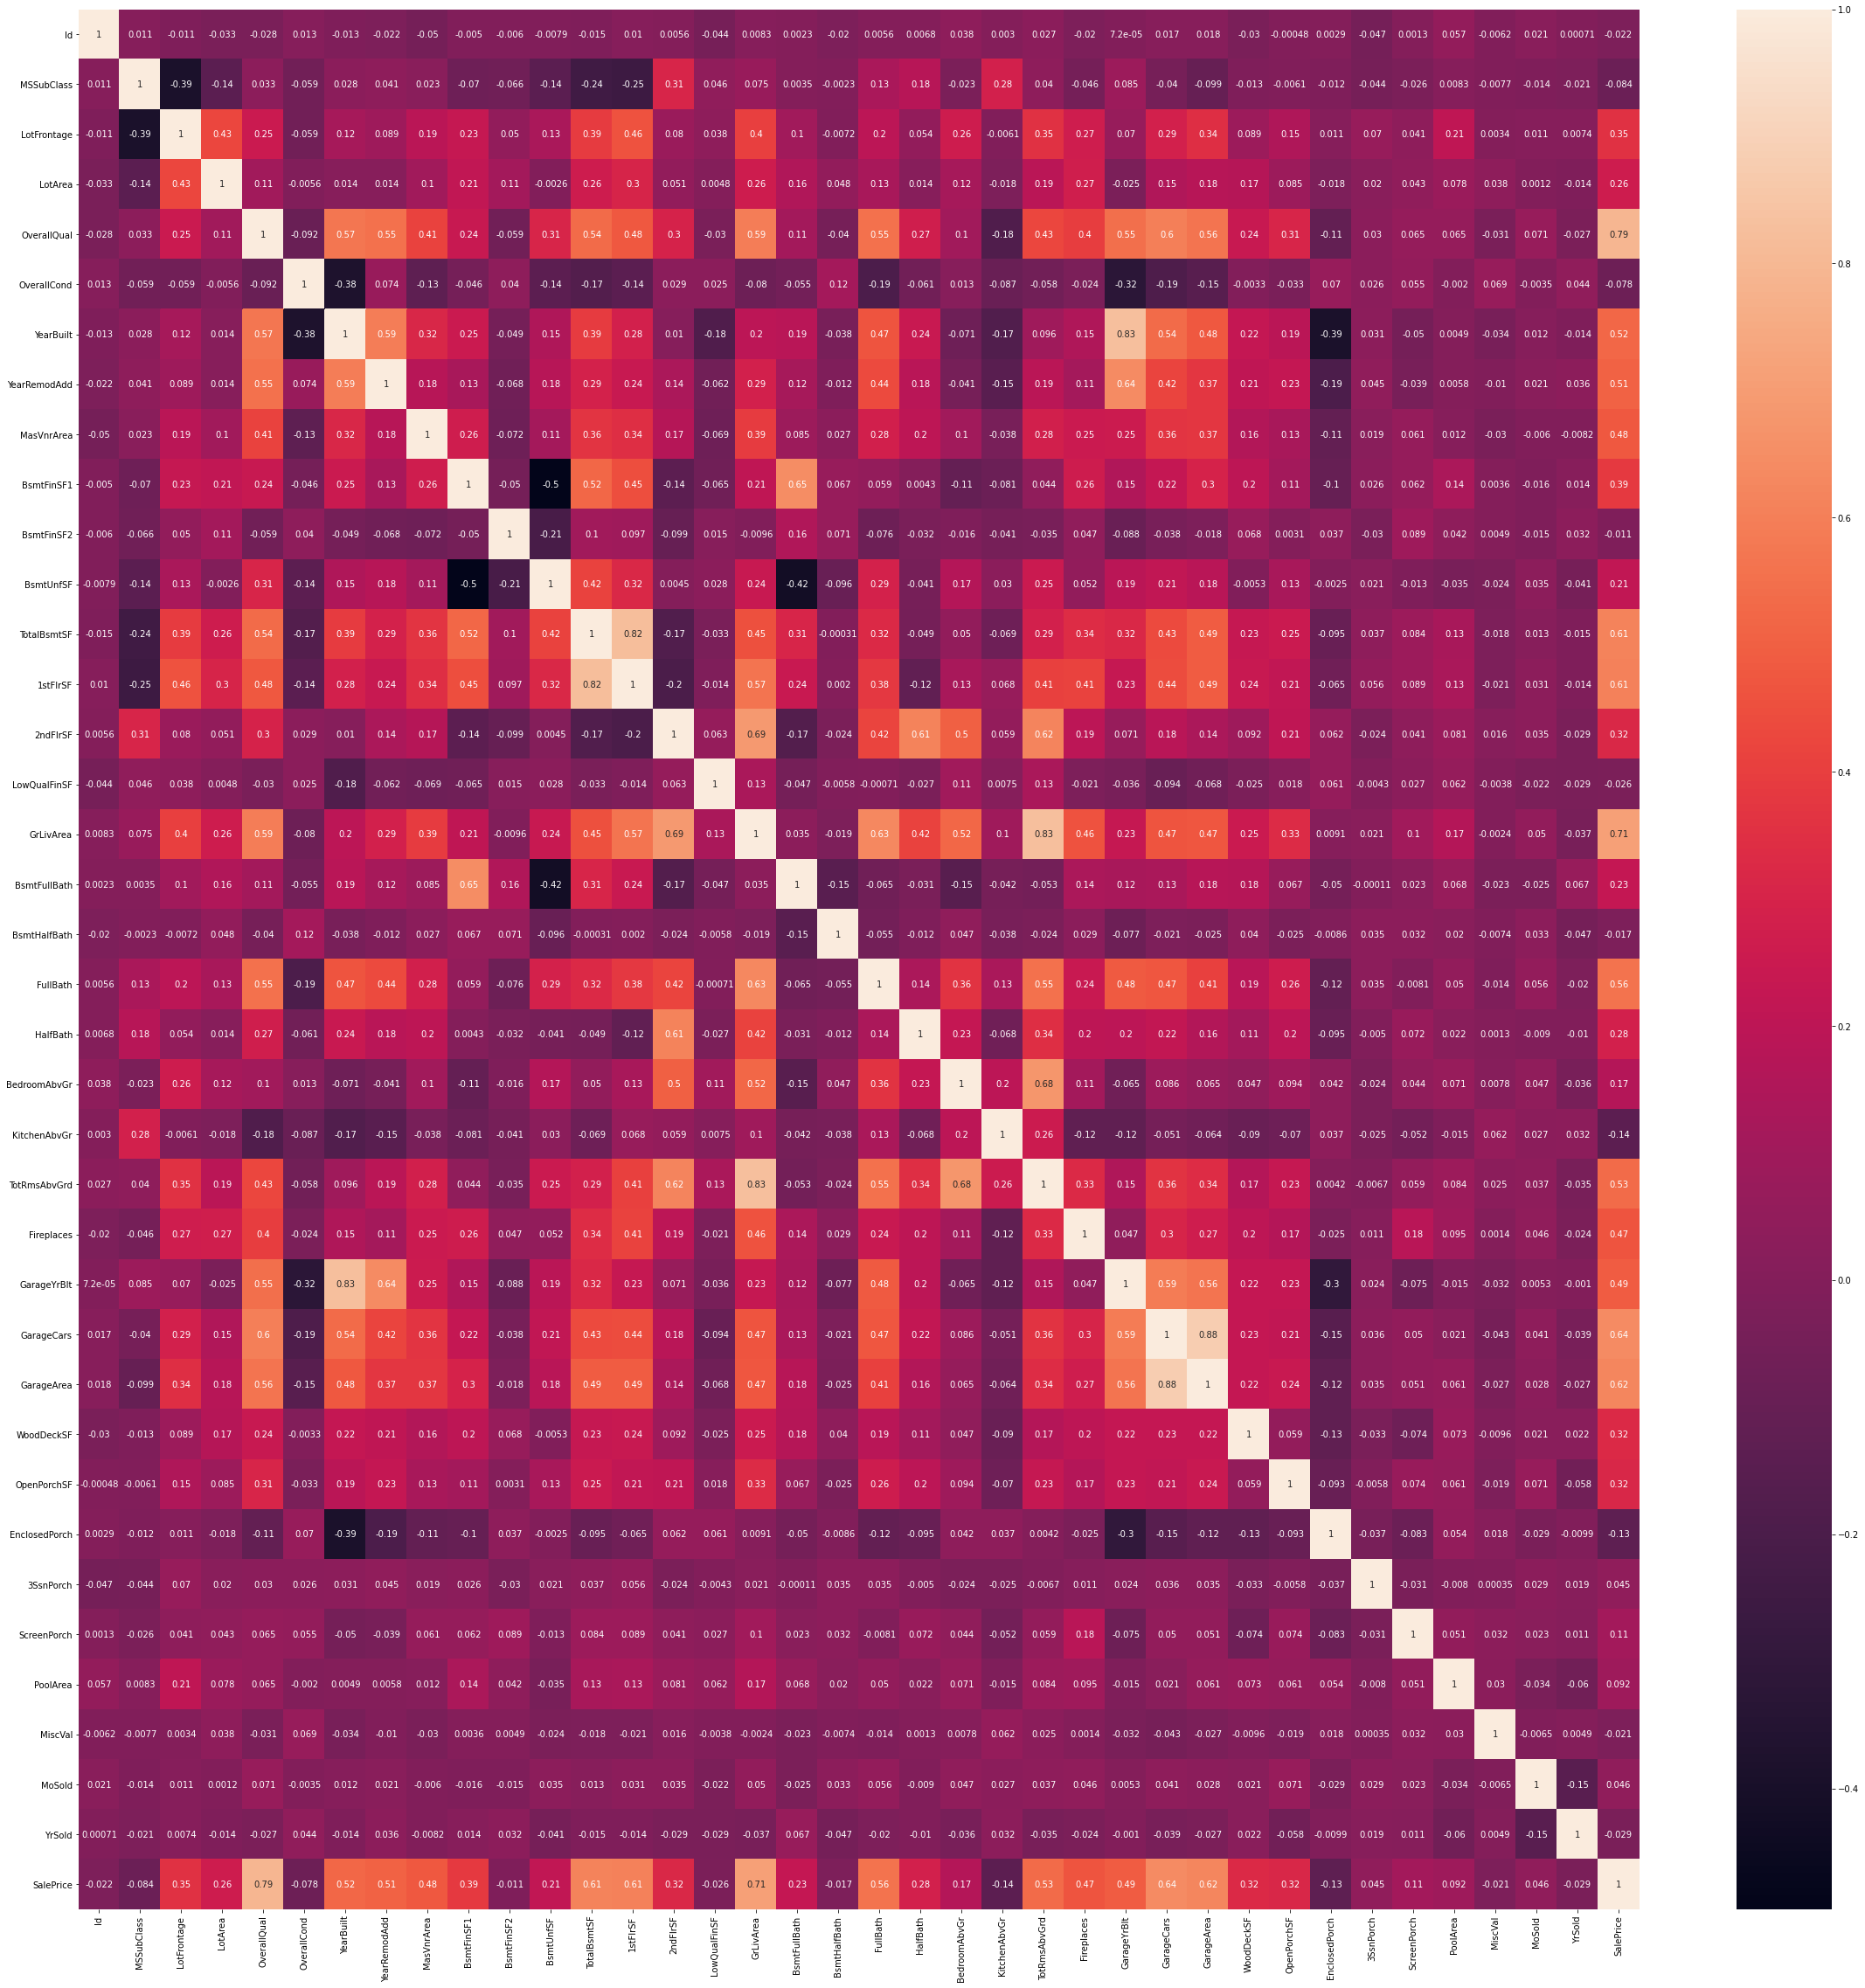

In [17]:
corr_matrix = df_train[numerical_features].corr()
plt.figure(figsize = (40,40))
sns.heatmap(corr_matrix, annot=True)

- dữ liệu tương quan với nhau ở mức trung bình, những feature có độ quan trọng cao được kể ra ở trên thì cũng tương quan nhiều tới các feature khác 

12. Do you know skewess and kurtosis? Try to explain them and check this dataset.

- **Skewness** is a measure of symmetry, or more precisely, the lack of symmetry. A distribution, or data set, is symmetric if it looks the same to the left and right of the center point. 
- **Kurtosis** is a measure of whether the data are heavy-tailed or light-tailed relative to a normal distribution.


In [18]:
from scipy.stats import kurtosis
from scipy.stats import skew

In [19]:
for i in numerical_features:
    print("kurtosis",i,":",kurtosis(df_train[i]))

kurtosis Id : -1.2000011259153338
kurtosis MSSubClass : 1.5706747728574895
kurtosis LotFrontage : nan
kurtosis LotArea : 202.5437927513529
kurtosis OverallQual : 0.091856548449611
kurtosis OverallCond : 1.0985212295913955
kurtosis YearBuilt : -0.44215484565294716
kurtosis YearRemodAdd : -1.2719991404772555
kurtosis MasVnrArea : nan
kurtosis BsmtFinSF1 : 11.076089857631942
kurtosis BsmtFinSF2 : 20.04041549471293
kurtosis BsmtUnfSF : 0.4692620789683075
kurtosis TotalBsmtSF : 13.201041630635025
kurtosis 1stFlrSF : 5.722076026587489
kurtosis 2ndFlrSF : -0.5556767272864769
kurtosis LowQualFinSF : 82.945932358931
kurtosis GrLivArea : 4.874265760253215
kurtosis BsmtFullBath : -0.8403341716305701
kurtosis BsmtHalfBath : 16.33643610470807
kurtosis FullBath : -0.8582173323828637
kurtosis HalfBath : -1.0773494880033716
kurtosis BedroomAbvGr : 2.2191351469935663
kurtosis KitchenAbvGr : 21.45462663100792
kurtosis TotRmsAbvGrd : 0.8736413737415689
kurtosis Fireplaces : -0.2206007337098992
kurtosis G

In [20]:
for i in numerical_features:
    print("skew",i,":",skew(df_train[i]))

skew Id : 0.0
skew MSSubClass : 1.4062101115313512
skew LotFrontage : nan
skew LotArea : 12.195142125084478
skew OverallQual : 0.2167209765258641
skew OverallCond : 0.6923552135520978
skew YearBuilt : -0.612830724202899
skew YearRemodAdd : -0.5030444967597948
skew MasVnrArea : nan
skew BsmtFinSF1 : 1.6837708962341815
skew BsmtFinSF2 : 4.250888017057445
skew BsmtUnfSF : 0.9193227015582005
skew TotalBsmtSF : 1.522688086978629
skew 1stFlrSF : 1.3753417421837937
skew 2ndFlrSF : 0.8121942731961613
skew LowQualFinSF : 9.002080417658552
skew GrLivArea : 1.365155954773434
skew BsmtFullBath : 0.5954540376067279
skew BsmtHalfBath : 4.0991856695420035
skew FullBath : 0.0365239844325461
skew HalfBath : 0.6752028347742616
skew BedroomAbvGr : 0.21157244158228097
skew KitchenAbvGr : 4.483784093860484
skew TotRmsAbvGrd : 0.6756457673102017
skew Fireplaces : 0.6488976310170327
skew GarageYrBlt : nan
skew GarageCars : -0.34219689543081294
skew GarageArea : 0.1797959420587727
skew WoodDeckSF : 1.53979169

13. Check outliers of this dataset

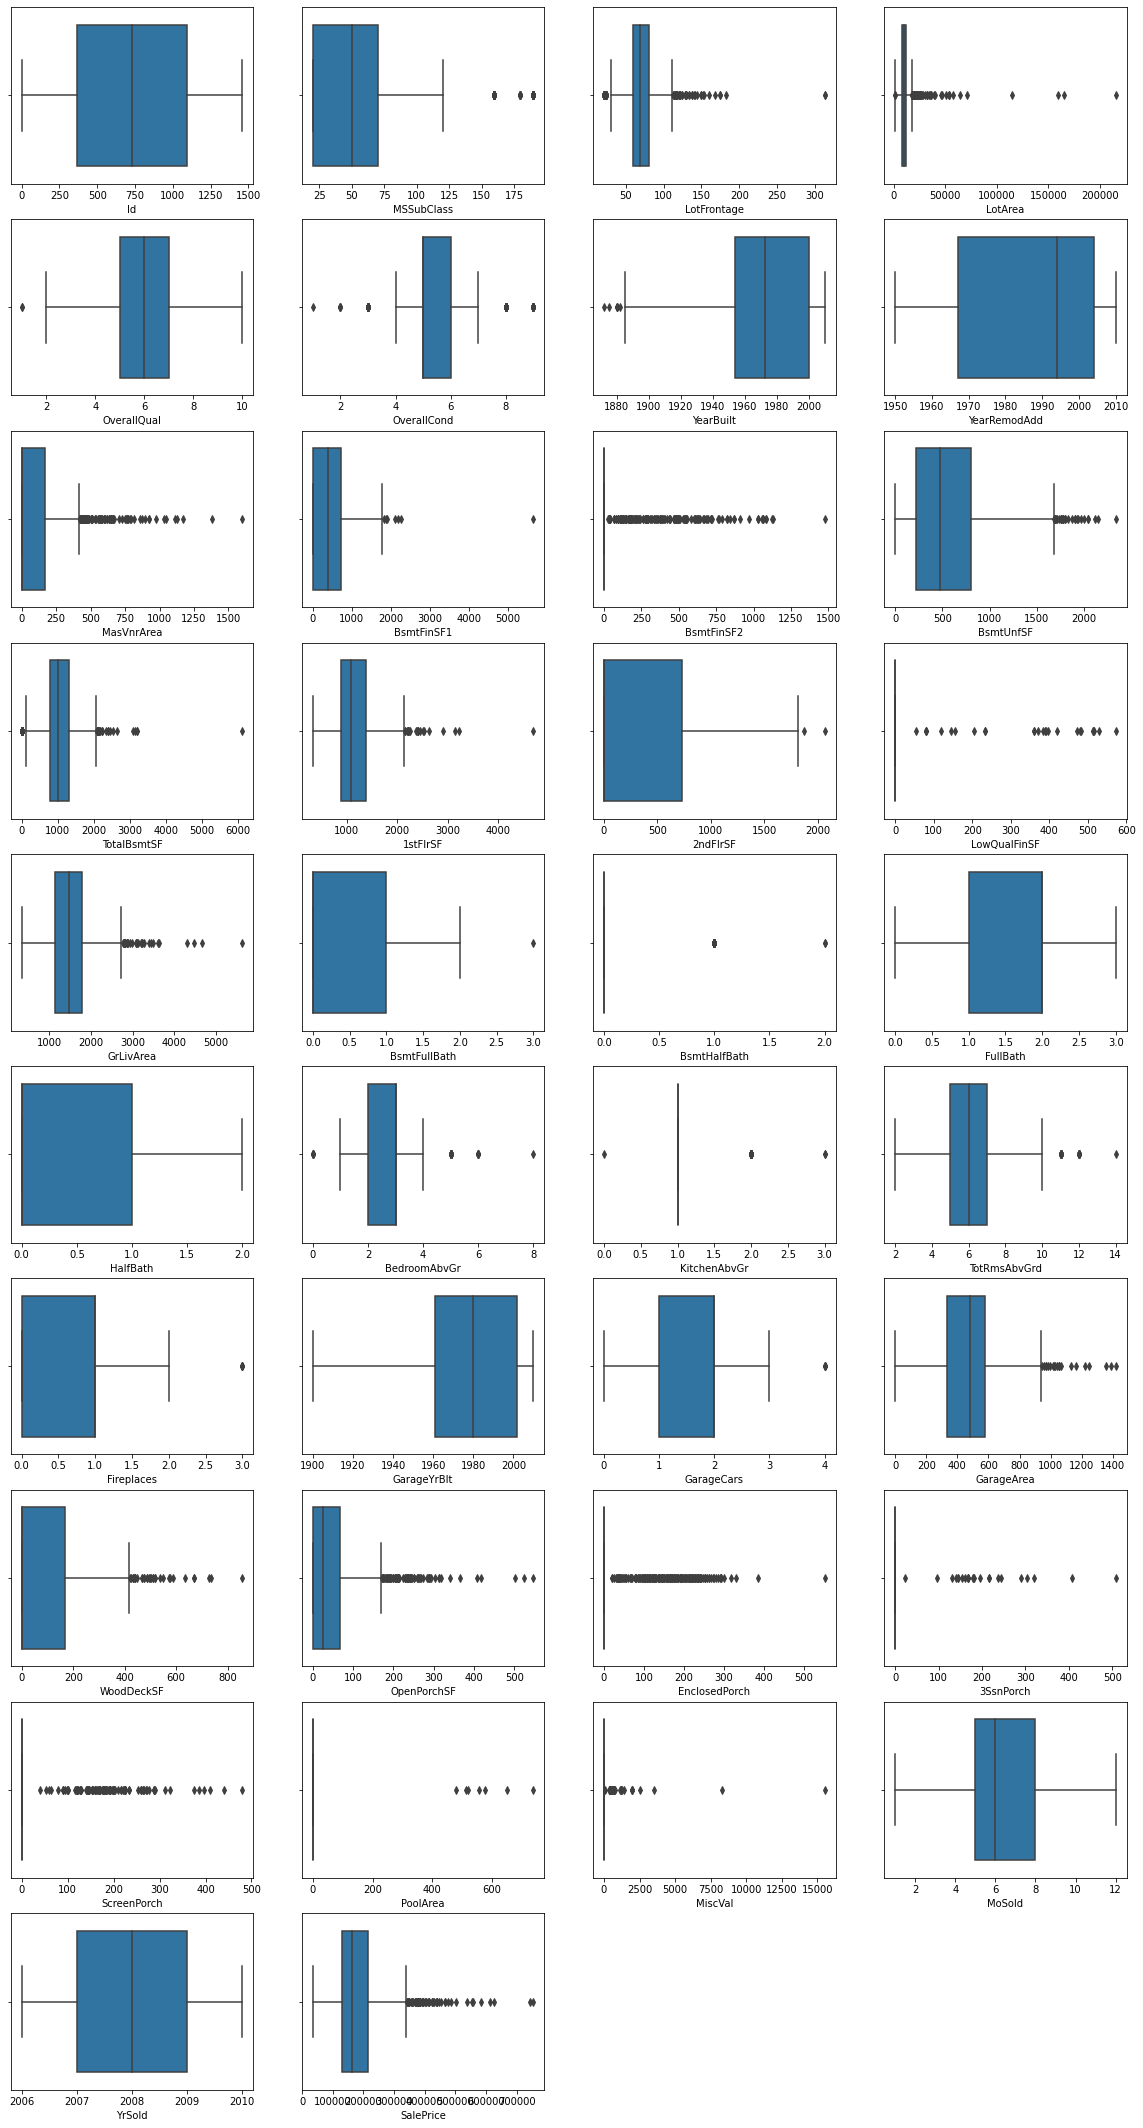

In [21]:
rows = 13
columns = 4
fig=plt.figure(figsize=(20, 50))
for i,fea in enumerate(numerical_features):
    fig.add_subplot(rows, columns, i+1)
    sns.boxplot(x=df_train[fea])

14. Compare train set and test set. Do they have the same distributions?

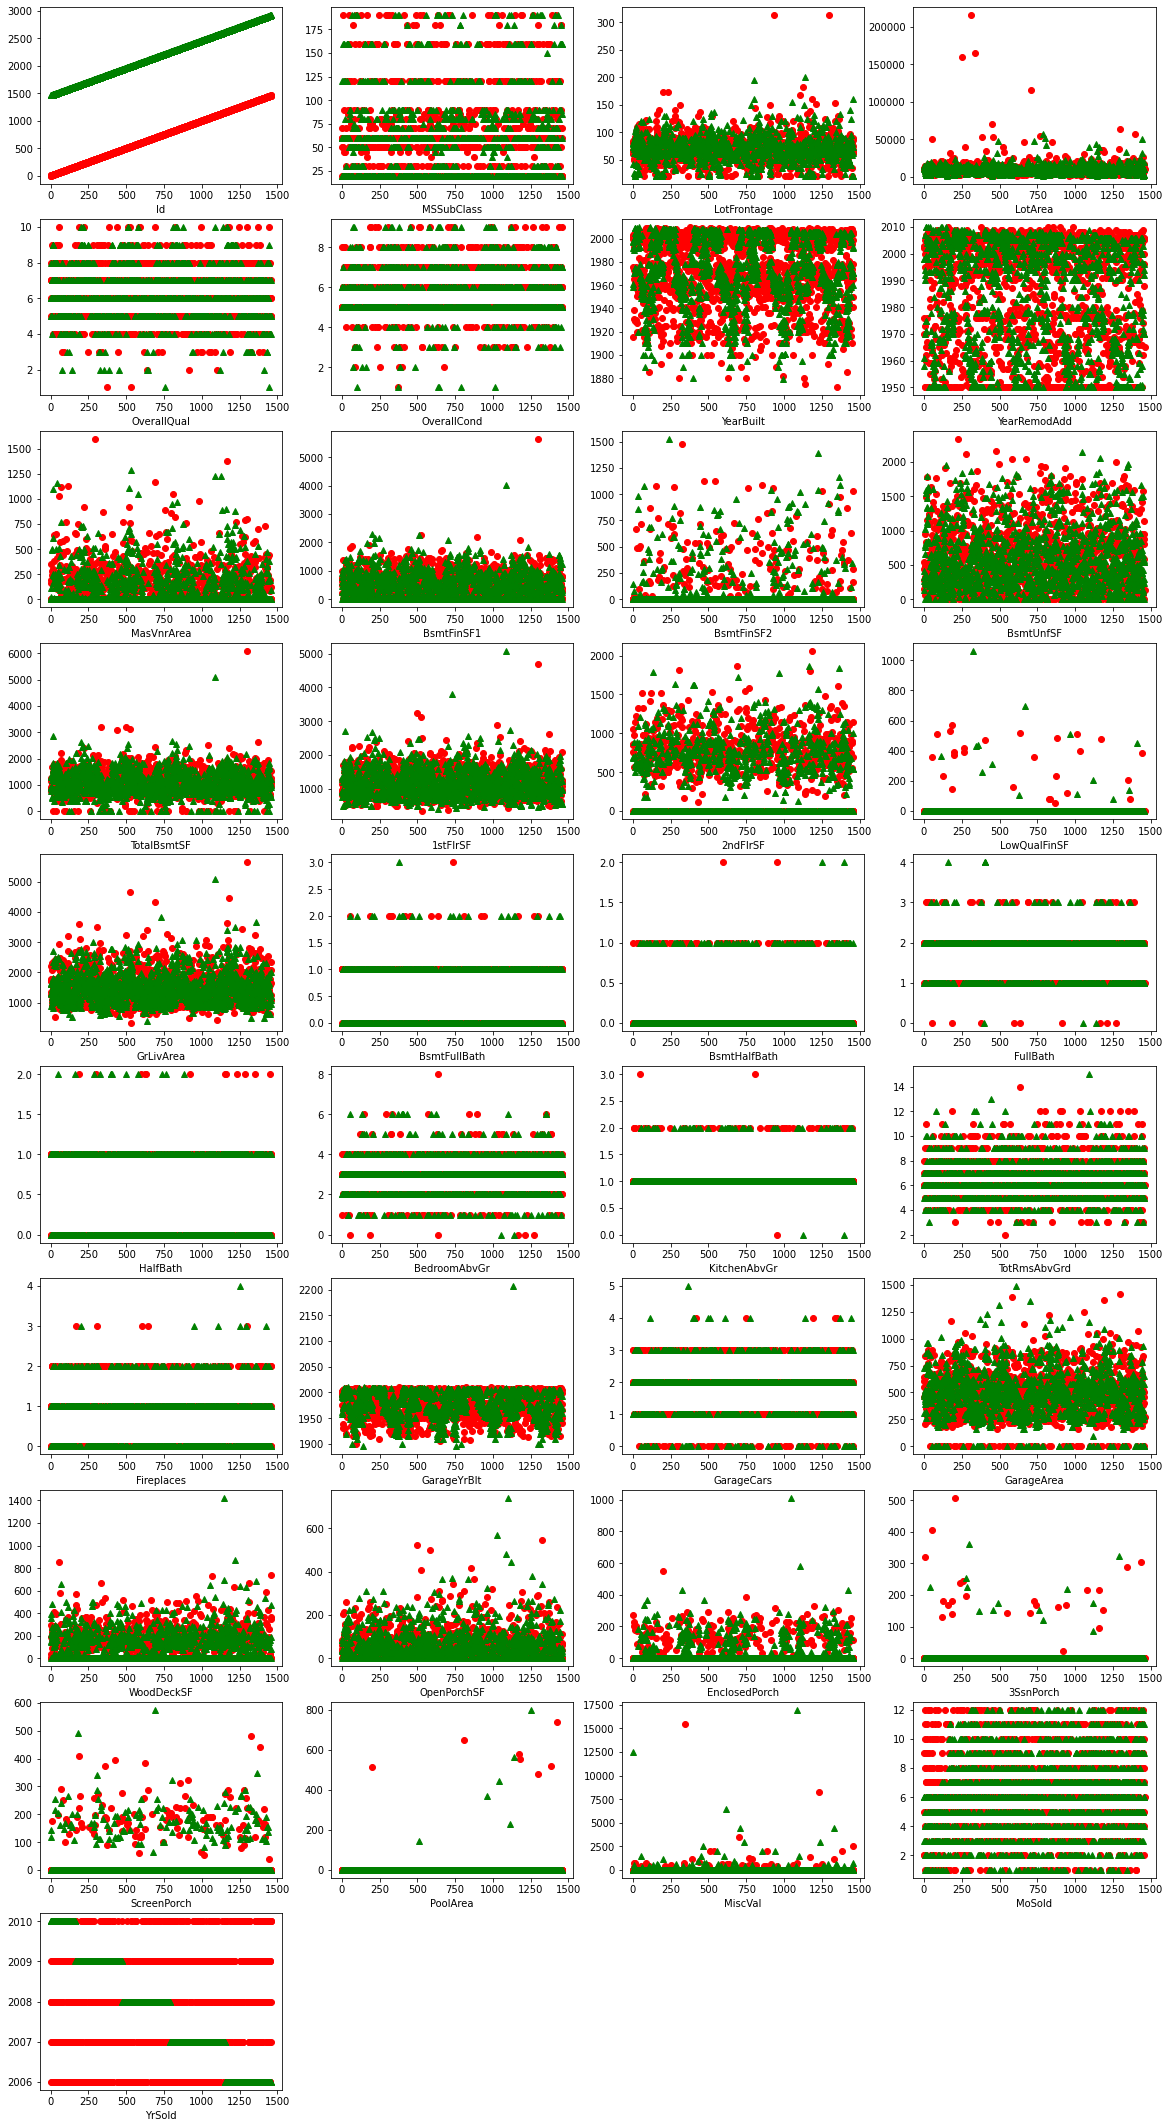

In [22]:
rows = 13
columns = 4
fig=plt.figure(figsize=(20, 50))
for i,fea in enumerate(numerical_features):
    if(fea == 'SalePrice'):
        continue
    fig.add_subplot(rows, columns, i+1)
    plt.plot(df_train[fea],'ro') # red -> train data
    plt.plot(df_test[fea],'g^') # green -> test data
    plt.xlabel(fea)

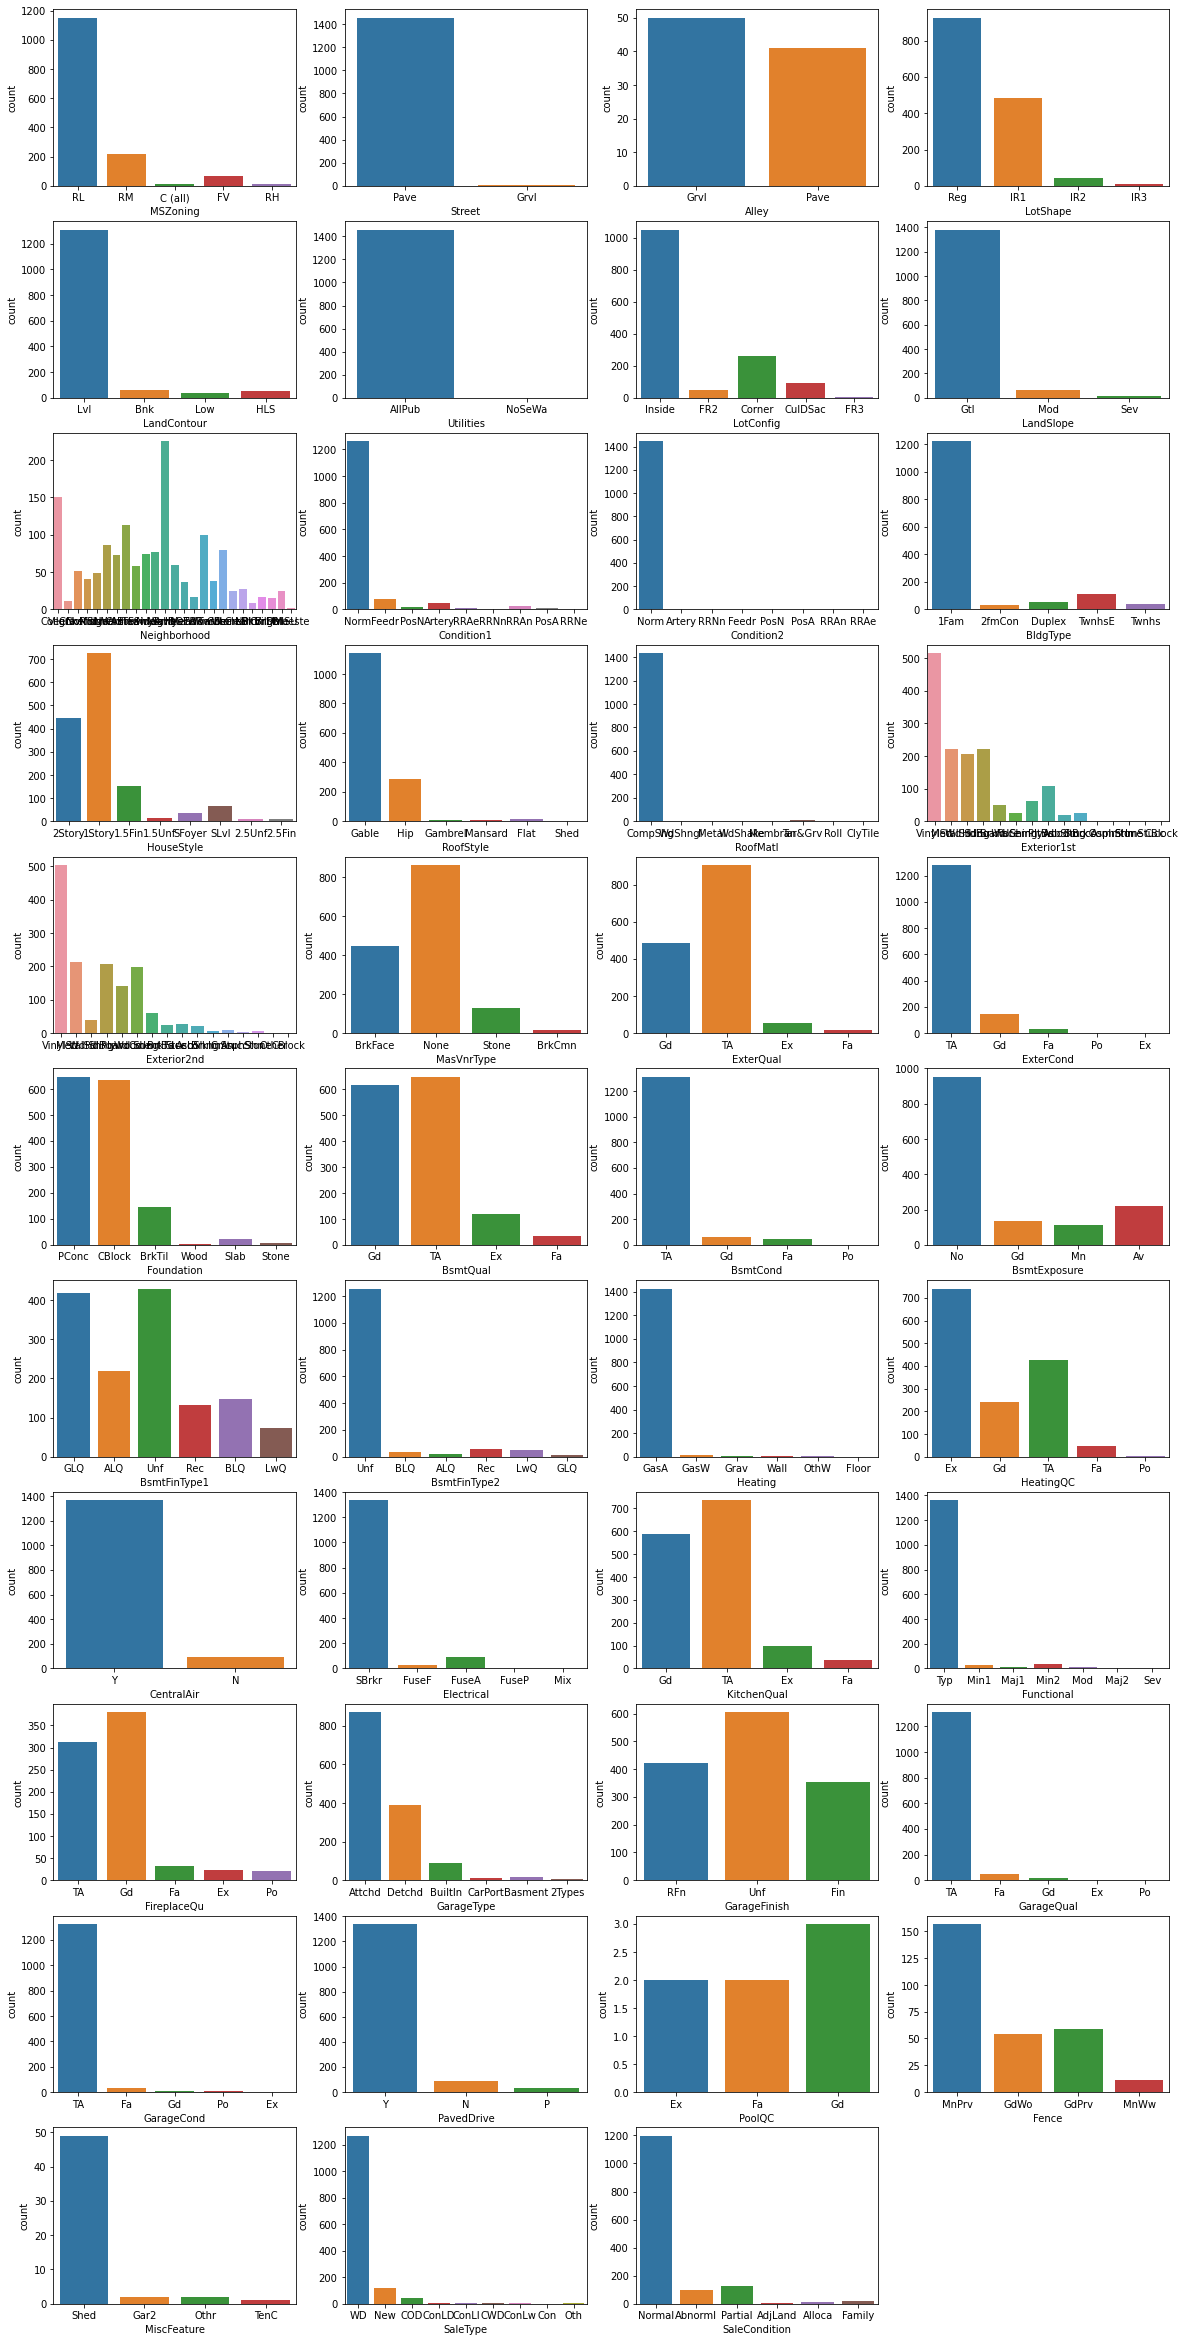

In [23]:
rows = 13
columns = 4
fig=plt.figure(figsize=(20, 50))
for i,fea in enumerate(categoricals_features):
    if(fea == 'SalePrice' or df_train[fea].dtype != 'object'):
        continue
    fig.add_subplot(rows, columns, i+1)
    sns.countplot(df_train[fea])

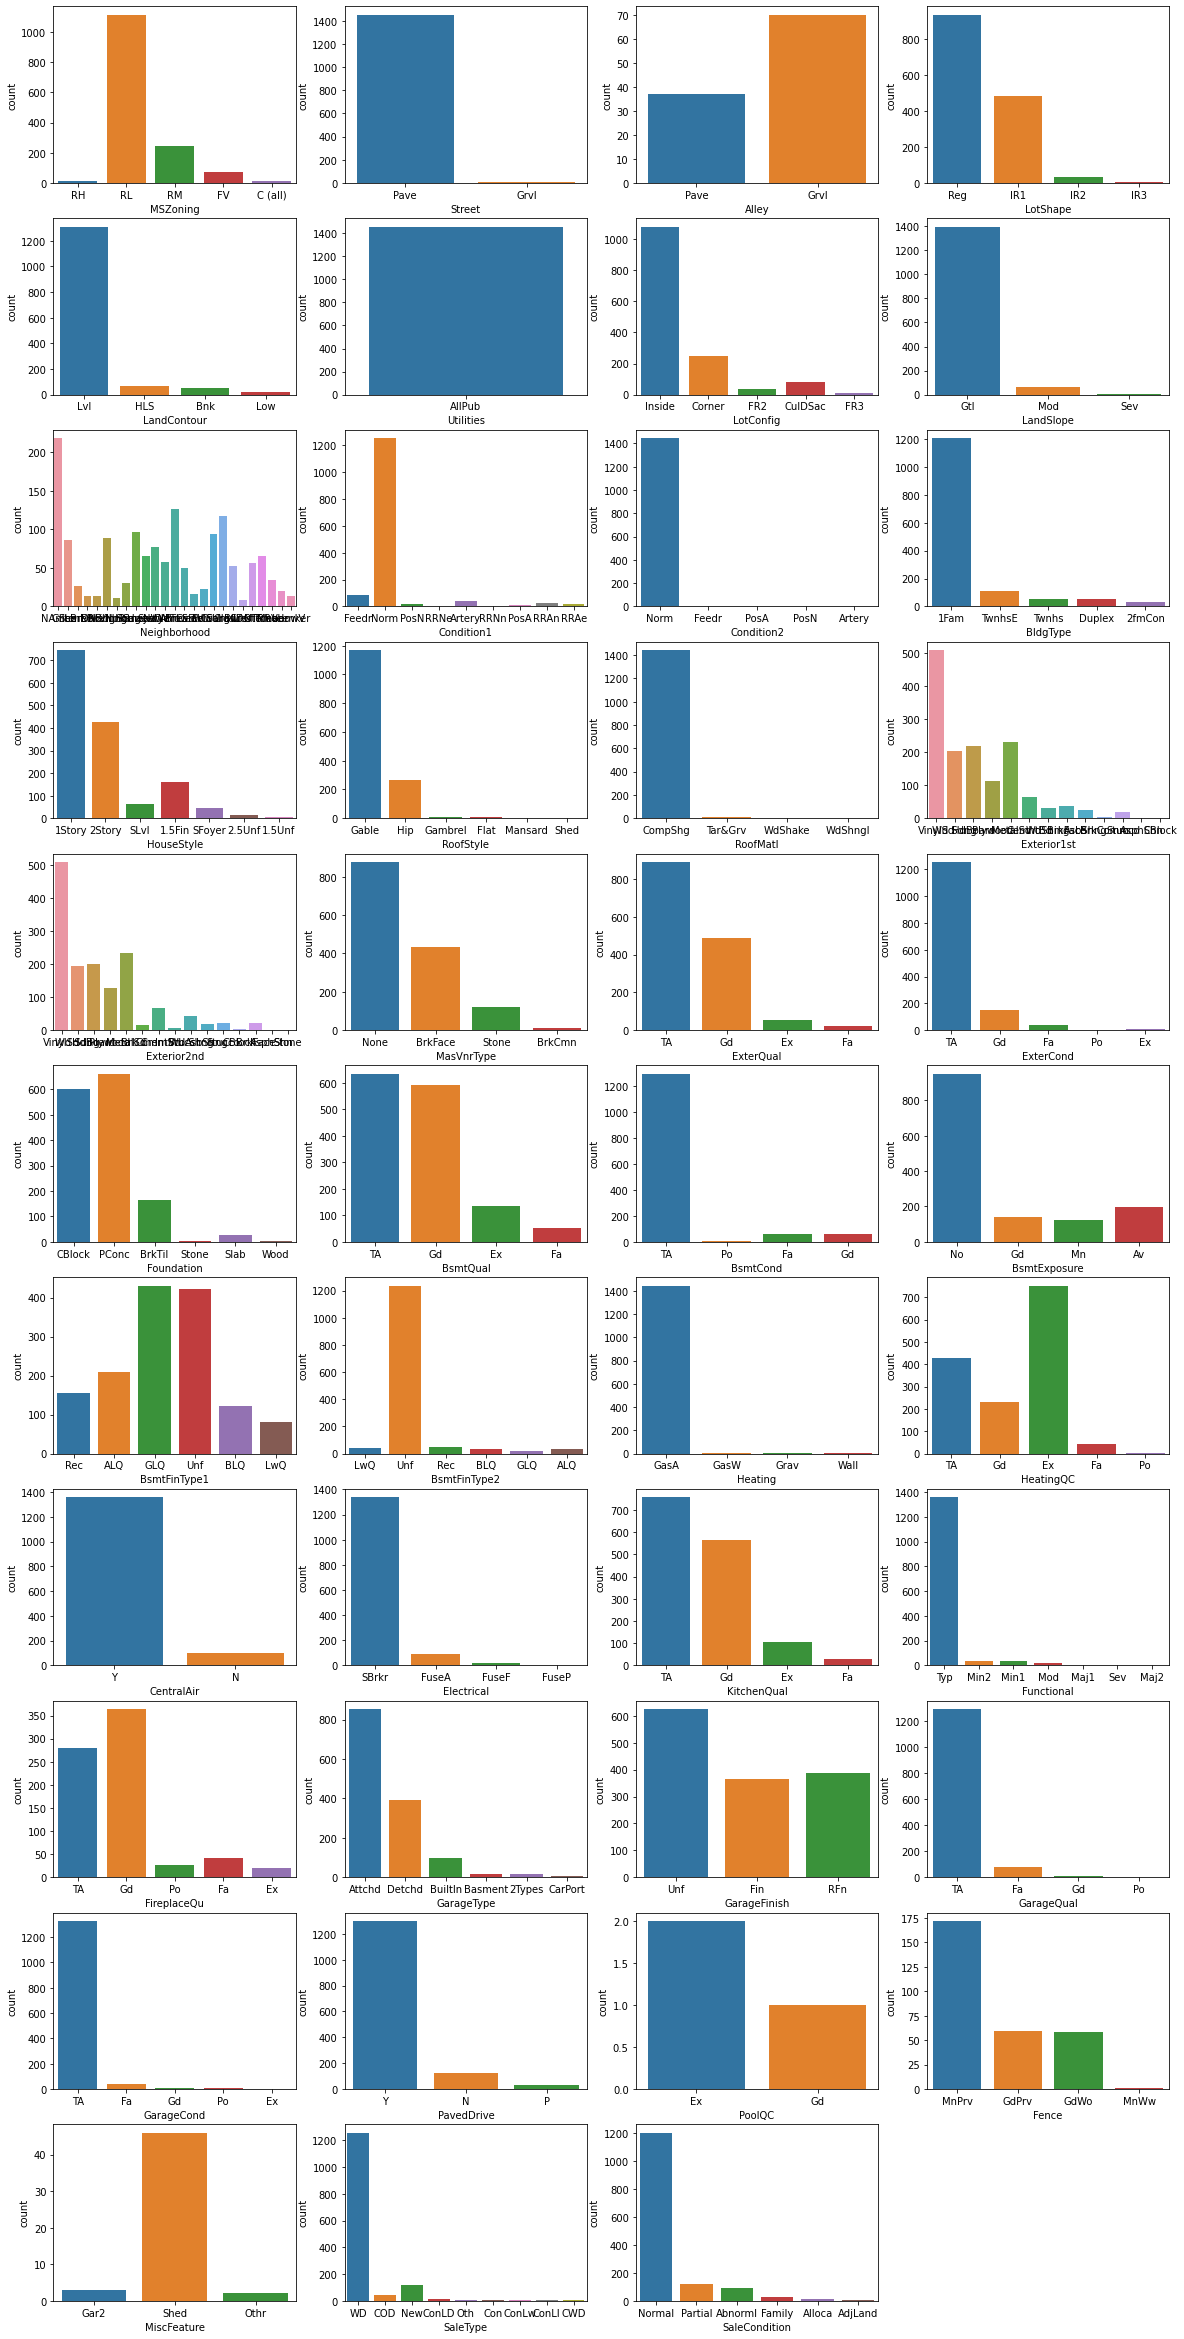

In [24]:
rows = 13
columns = 4
fig=plt.figure(figsize=(20, 50))
for i,fea in enumerate(categoricals_features):
    if(fea == 'SalePrice' or df_train[fea].dtype != 'object'):
        continue
    fig.add_subplot(rows, columns, i+1)
    sns.countplot(df_test[fea])

- Data distribution in test and train sets is quite similar

15. Hypothesis: does sale price go up each year? Confirm it.

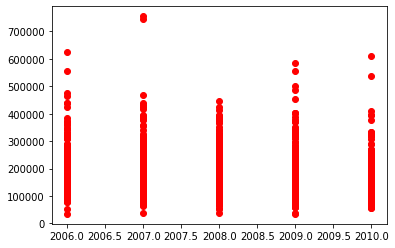

In [25]:
plt.plot(df_train['YrSold'],df_train['SalePrice'],'ro')

#### The sale price does not increase each year

16. Hypotheis: seasons (spring, summer, fall, winter) also affect sale price. Confirm it.

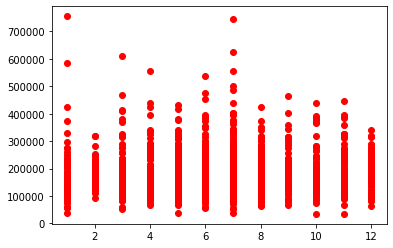

In [26]:
plt.plot(df_train['MoSold'],df_train['SalePrice'],'ro')

#### July sale price is higher. Seasons (spring, summer, fall, winter) also affect sale price is not true.

17. Think up 3 other hypotheses and confirm them.

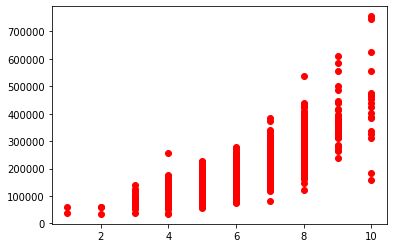

In [27]:
# OverallQual affect to SalePrice
plt.plot(df_train['OverallQual'],df_train['SalePrice'],'ro')

- Rates the overall material and finish of the house is high, SalePrice high

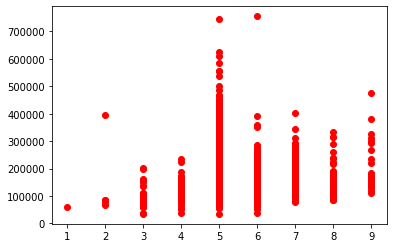

In [28]:
# OverallCond affect to SalePrice
plt.plot(df_train['OverallCond'],df_train['SalePrice'],'ro')

- Rates the overall condition of the house is high, SalePrice high
- Average -> SalePrice still high

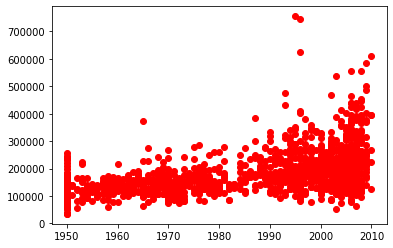

In [29]:
# YearRemodAdd affect to SalePrice
plt.plot(df_train['YearRemodAdd'],df_train['SalePrice'],'ro')

- Recently remodel, the Sale Price is high

### Feature Engineering

18. Numerical features:
- What can we do with these features? How to handle missing values? Do we need to scale each feature?
- Let's practice with our dataset.

In [30]:
miss_feature = []
for i in df_train:
    if(df_train.shape[0] - df_train[i].isna().sum() != 0):
        miss_feature.append(i)
print(miss_feature)

['Id', 'MSSubClass', 'MSZoning', 'LotFrontage', 'LotArea', 'Street', 'Alley', 'LotShape', 'LandContour', 'Utilities', 'LotConfig', 'LandSlope', 'Neighborhood', 'Condition1', 'Condition2', 'BldgType', 'HouseStyle', 'OverallQual', 'OverallCond', 'YearBuilt', 'YearRemodAdd', 'RoofStyle', 'RoofMatl', 'Exterior1st', 'Exterior2nd', 'MasVnrType', 'MasVnrArea', 'ExterQual', 'ExterCond', 'Foundation', 'BsmtQual', 'BsmtCond', 'BsmtExposure', 'BsmtFinType1', 'BsmtFinSF1', 'BsmtFinType2', 'BsmtFinSF2', 'BsmtUnfSF', 'TotalBsmtSF', 'Heating', 'HeatingQC', 'CentralAir', 'Electrical', '1stFlrSF', '2ndFlrSF', 'LowQualFinSF', 'GrLivArea', 'BsmtFullBath', 'BsmtHalfBath', 'FullBath', 'HalfBath', 'BedroomAbvGr', 'KitchenAbvGr', 'KitchenQual', 'TotRmsAbvGrd', 'Functional', 'Fireplaces', 'FireplaceQu', 'GarageType', 'GarageYrBlt', 'GarageFinish', 'GarageCars', 'GarageArea', 'GarageQual', 'GarageCond', 'PavedDrive', 'WoodDeckSF', 'OpenPorchSF', 'EnclosedPorch', '3SsnPorch', 'ScreenPorch', 'PoolArea', 'PoolQC'

In [31]:
#If feature missing more than 70% -> drop
drop_features = []
df_new_train = df_train
for i in miss_feature:
    if(df_train[i].isna().sum()/df_train[i].shape[0] >= 0.7):
        df_new_train = df_new_train.drop([i],axis=1)
        drop_features.append(i)
        print(i)
        print(df_train[i].isna().sum()/df_train[i].shape[0])
df_new_train

Alley
0.9376712328767123
PoolQC
0.9952054794520548
Fence
0.8075342465753425
MiscFeature
0.963013698630137


,Id,MSSubClass,MSZoning,LotFrontage,LotArea,Street,LotShape,LandContour,Utilities,LotConfig,LandSlope,Neighborhood,Condition1,Condition2,BldgType,HouseStyle,OverallQual,OverallCond,YearBuilt,YearRemodAdd,RoofStyle,RoofMatl,Exterior1st,Exterior2nd,MasVnrType,MasVnrArea,ExterQual,ExterCond,Foundation,BsmtQual,BsmtCond,BsmtExposure,BsmtFinType1,BsmtFinSF1,BsmtFinType2,BsmtFinSF2,BsmtUnfSF,TotalBsmtSF,Heating,HeatingQC,CentralAir,Electrical,1stFlrSF,2ndFlrSF,LowQualFinSF,GrLivArea,BsmtFullBath,BsmtHalfBath,FullBath,HalfBath,BedroomAbvGr,KitchenAbvGr,KitchenQual,TotRmsAbvGrd,Functional,Fireplaces,FireplaceQu,GarageType,GarageYrBlt,GarageFinish,GarageCars,GarageArea,GarageQual,GarageCond,PavedDrive,WoodDeckSF,OpenPorchSF,EnclosedPorch,3SsnPorch,ScreenPorch,PoolArea,MiscVal,MoSold,YrSold,SaleType,SaleCondition,SalePrice
0,1,60,RL,65.0,8450,Pave,Reg,Lvl,AllPub,Inside,Gtl,CollgCr,Norm,Norm,1Fam,2Story,7,5,2003,2003,Gable,CompShg,VinylSd,VinylSd,BrkFace,196.0,Gd,TA,PConc,Gd,TA,No,GLQ,706,Unf,0,150,856,GasA,Ex,Y,SBrkr,856,854,0,1710,1,0,2,1,3,1,Gd,8,Typ,0,NaN,Attchd,2003.0,RFn,2,548,TA,TA,Y,0,61,0,0,0,0,0,2,2008,WD,Normal,208500
1,2,20,RL,80.0,9600,Pave,Reg,Lvl,AllPub,FR2,Gtl,Veenker,Feedr,Norm,1Fam,1Story,6,8,1976,1976,Gable,CompShg,MetalSd,MetalSd,None,0.0,TA,TA,CBlock,Gd,TA,Gd,ALQ,978,Unf,0,284,1262,GasA,Ex,Y,SBrkr,1262,0,0,1262,0,1,2,0,3,1,TA,6,Typ,1,TA,Attchd,1976.0,RFn,2,460,TA,TA,Y,298,0,0,0,0,0,0,5,2007,WD,Normal,181500
2,3,60,RL,68.0,11250,Pave,IR1,Lvl,AllPub,Inside,Gtl,CollgCr,Norm,Norm,1Fam,2Story,7,5,2001,2002,Gable,CompShg,VinylSd,VinylSd,BrkFace,162.0,Gd,TA,PConc,Gd,TA,Mn,GLQ,486,Unf,0,434,920,GasA,Ex,Y,SBrkr,920,866,0,1786,1,0,2,1,3,1,Gd,6,Typ,1,TA,Attchd,2001.0,RFn,2,608,TA,TA,Y,0,42,0,0,0,0,0,9,2008,WD,Normal,223500
3,4,70,RL,60.0,9550,Pave,IR1,Lvl,AllPub,Corner,Gtl,Crawfor,Norm,Norm,1Fam,2Story,7,5,1915,1970,Gable,CompShg,Wd Sdng,Wd Shng,None,0.0,TA,TA,BrkTil,TA,Gd,No,ALQ,216,Unf,0,540,756,GasA,Gd,Y,SBrkr,961,756,0,1717,1,0,1,0,3,1,Gd,7,Typ,1,Gd,Detchd,1998.0,Unf,3,642,TA,TA,Y,0,35,272,0,0,0,0,2,2006,WD,Abnorml,140000
4,5,60,RL,84.0,14260,Pave,IR1,Lvl,AllPub,FR2,Gtl,NoRidge,Norm,Norm,1Fam,2Story,8,5,2000,2000,Gable,CompShg,VinylSd,VinylSd,BrkFace,350.0,Gd,TA,PConc,Gd,TA,Av,GLQ,655,Unf,0,490,1145,GasA,Ex,Y,SBrkr,1145,1053,0,2198,1,0,2,1,4,1,Gd,9,Typ,1,TA,Attchd,2000.0,RFn,3,836,TA,TA,Y,192,84,0,0,0,0,0,12,2008,WD,Normal,250000
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
1455,1456,60,RL,62.0,7917,Pave,Reg,Lvl,AllPub,Inside,Gtl,Gilbert,Norm,Norm,1Fam,2Story,6,5,1999,2000,Gable,CompShg,VinylSd,VinylSd,None,0.0,TA,TA,PConc,Gd,TA,No,Unf,0,Unf,0,953,953,GasA,Ex,Y,SBrkr,953,694,0,1647,0,0,2,1,3,1,TA,7,Typ,1,TA,Attchd,1999.0,RFn,2,460,TA,TA,Y,0,40,0,0,0,0,0,8,2007,WD,Normal,175000
1456,1457,20,RL,85.0,13175,Pave,Reg,Lvl,AllPub,Inside,Gtl,NWAmes,Norm,Norm,1Fam,1Story,6,6,1978,1988,Gable,CompShg,Plywood,Plywood,Stone,119.0,TA,TA,CBlock,Gd,TA,No,ALQ,790,Rec,163,589,1542,GasA,TA,Y,SBrkr,2073,0,0,2073,1,0,2,0,3,1,TA,7,Min1,2,TA,Attchd,1978.0,Unf,2,500,TA,TA,Y,349,0,0,0,0,0,0,2,2010,WD,Normal,210000
1457,1458,70,RL,66.0,9042,Pave,Reg,Lvl,AllPub,Inside,Gtl,Crawfor,Norm,Norm,1Fam,2Story,7,9,1941,2006,Gable,CompShg,CemntBd,CmentBd,None,0.0,Ex,Gd,Stone,TA,Gd,No,GLQ,275,Unf,0,877,1152,GasA,Ex,Y,SBrkr,1188,1152,0,2340,0,0,2,0,4,1,Gd,9,Typ,2,Gd,Attchd,1941.0,RFn,1,252,TA,TA,Y,0,60,0,0,0,0,2500,5,2010,WD,Normal,266500
1458,1459,20,RL,68.0,9717,Pave,Reg,Lvl,AllPub,Inside,Gtl,NAmes,Norm,Norm,1Fam,1Story,5,6,1950,1996,Hip,CompShg,MetalSd,MetalSd,None,0.0,TA,TA,CBlock,TA,TA,Mn,GLQ,49,Rec,1029,0,1078,GasA,Gd,Y,FuseA,1078,0,0,1078,1,0,1,0,2,1,Gd,5,Typ,0,NaN,Attchd,1950.0,Unf,1,240,TA,TA,Y,366,0,112,0,0,0,0,4,2010,WD,Normal,142125


In [32]:
#drop feature id, because haven't much information 
df_new_train = df_new_train.drop(['Id'],axis=1)

In [33]:
# fill missing values = mean or mode
for i in df_new_train:
    if(df_new_train[i].dtype == 'object'):
        df_new_train[i] = df_new_train[i].fillna(df_new_train[i].mode()[0])
    else :
        df_new_train[i] = df_new_train[i].fillna(df_new_train[i].mean())
df_new_train.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 1460 entries, 0 to 1459
Data columns (total 76 columns):
 #   Column         Non-Null Count  Dtype  
---  ------         --------------  -----  
 0   MSSubClass     1460 non-null   int64  
 1   MSZoning       1460 non-null   object 
 2   LotFrontage    1460 non-null   float64
 3   LotArea        1460 non-null   int64  
 4   Street         1460 non-null   object 
 5   LotShape       1460 non-null   object 
 6   LandContour    1460 non-null   object 
 7   Utilities      1460 non-null   object 
 8   LotConfig      1460 non-null   object 
 9   LandSlope      1460 non-null   object 
 10  Neighborhood   1460 non-null   object 
 11  Condition1     1460 non-null   object 
 12  Condition2     1460 non-null   object 
 13  BldgType       1460 non-null   object 
 14  HouseStyle     1460 non-null   object 
 15  OverallQual    1460 non-null   int64  
 16  OverallCond    1460 non-null   int64  
 17  YearBuilt      1460 non-null   int64  
 18  YearRemo

19. Categorical features:
- Understand OneHotEncoder, OrdinalEncoder. Do you know Target Encoding? When to use Target Encoding and does it have caveats?
- Try to encode the categorical features in this dataset using suitable encoders above.

### * Target Encoding
- Target encoding where you average the target value by category
- Used for the classification problem
- Easily overfitting

In [34]:
def onehot(df_new_train,features):
    for i in features:
        df_new_train = pd.concat([df_new_train, pd.get_dummies(df_new_train[i])], axis=1)
    return df_new_train
    

In [35]:
Ordinal_Encoder = ['LotShape', 'LandSlope','ExterQual','ExterCond','BsmtQual','BsmtCond','BsmtExposure','HeatingQC',
                  'KitchenQual','FireplaceQu','GarageQual','GarageCond','PoolQC']
One_Hot_Encoder = []

for i in categoricals_features:
    if(i in drop_features or i in Ordinal_Encoder):
        continue
    One_Hot_Encoder.append(i)

# ordinal encoder những data dạng tăng tiến 
oe = OrdinalEncoder()
for i in Ordinal_Encoder:
    if(i in drop_features):
        continue
    df_new_train[i] = oe.fit_transform(np.array(df_new_train[i]).reshape(-1,1))

# onehot 
df_new_train = onehot(df_new_train,One_Hot_Encoder)
df_new_train = df_new_train.drop(columns=One_Hot_Encoder,axis=1)


df_new_train.head()

,MSSubClass,LotFrontage,LotArea,LotShape,LandSlope,OverallQual,OverallCond,YearBuilt,YearRemodAdd,MasVnrArea,ExterQual,ExterCond,BsmtQual,BsmtCond,BsmtExposure,BsmtFinSF1,BsmtFinSF2,BsmtUnfSF,TotalBsmtSF,HeatingQC,1stFlrSF,2ndFlrSF,LowQualFinSF,GrLivArea,BsmtFullBath,BsmtHalfBath,FullBath,HalfBath,BedroomAbvGr,KitchenAbvGr,KitchenQual,TotRmsAbvGrd,Fireplaces,FireplaceQu,GarageYrBlt,GarageCars,GarageArea,GarageQual,GarageCond,WoodDeckSF,OpenPorchSF,EnclosedPorch,3SsnPorch,ScreenPorch,PoolArea,MiscVal,MoSold,YrSold,SalePrice,C (all),FV,RH,RL,RM,Grvl,Pave,Bnk,HLS,Low,Lvl,AllPub,NoSeWa,Corner,CulDSac,FR2,FR3,Inside,Blmngtn,Blueste,BrDale,BrkSide,ClearCr,CollgCr,Crawfor,Edwards,Gilbert,IDOTRR,MeadowV,Mitchel,NAmes,NPkVill,NWAmes,NoRidge,NridgHt,OldTown,SWISU,Sawyer,SawyerW,Somerst,StoneBr,Timber,Veenker,Artery,Feedr,Norm,PosA,PosN,RRAe,RRAn,RRNe,RRNn,Artery,Feedr,Norm,PosA,PosN,RRAe,RRAn,RRNn,1Fam,2fmCon,Duplex,Twnhs,TwnhsE,1.5Fin,1.5Unf,1Story,2.5Fin,2.5Unf,2Story,SFoyer,SLvl,Flat,Gable,Gambrel,Hip,Mansard,Shed,ClyTile,CompShg,Membran,Metal,Roll,Tar&Grv,WdShake,WdShngl,AsbShng,AsphShn,BrkComm,BrkFace,CBlock,CemntBd,HdBoard,ImStucc,MetalSd,Plywood,Stone,Stucco,VinylSd,Wd Sdng,WdShing,AsbShng,AsphShn,Brk Cmn,BrkFace,CBlock,CmentBd,HdBoard,ImStucc,MetalSd,Other,Plywood,Stone,Stucco,VinylSd,Wd Sdng,Wd Shng,BrkCmn,BrkFace,None,Stone,BrkTil,CBlock,PConc,Slab,Stone,Wood,ALQ,BLQ,GLQ,LwQ,Rec,Unf,ALQ,BLQ,GLQ,LwQ,Rec,Unf,Floor,GasA,GasW,Grav,OthW,Wall,N,Y,FuseA,FuseF,FuseP,Mix,SBrkr,Maj1,Maj2,Min1,Min2,Mod,Sev,Typ,2Types,Attchd,Basment,BuiltIn,CarPort,Detchd,Fin,RFn,Unf,N,P,Y,COD,CWD,Con,ConLD,ConLI,ConLw,New,Oth,WD,Abnorml,AdjLand,Alloca,Family,Normal,Partial
0,60,65.0,8450,3.0,0.0,7,5,2003,2003,196.0,2.0,4.0,2.0,3.0,3.0,706,0,150,856,0.0,856,854,0,1710,1,0,2,1,3,1,2.0,8,0,2.0,2003.0,2,548,4.0,4.0,0,61,0,0,0,0,0,2,2008,208500,0,0,0,1,0,0,1,0,0,0,1,1,0,0,0,0,0,1,0,0,0,0,0,1,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,1,0,0,0,0,0,0,0,0,1,0,0,0,0,0,1,0,0,0,0,0,0,0,0,0,1,0,0,0,1,0,0,0,0,0,1,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,1,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,1,0,0,0,1,0,0,0,0,1,0,0,0,0,0,1,0,0,0,0,0,0,0,0,1,0,1,0,0,0,0,0,1,0,0,0,0,1,0,0,0,0,0,0,1,0,1,0,0,0,0,0,1,0,0,0,1,0,0,0,0,0,0,0,0,1,0,0,0,0,1,0
1,20,80.0,9600,3.0,0.0,6,8,1976,1976,0.0,3.0,4.0,2.0,3.0,1.0,978,0,284,1262,0.0,1262,0,0,1262,0,1,2,0,3,1,3.0,6,1,4.0,1976.0,2,460,4.0,4.0,298,0,0,0,0,0,0,5,2007,181500,0,0,0,1,0,0,1,0,0,0,1,1,0,0,0,1,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,1,0,1,0,0,0,0,0,0,0,0,0,1,0,0,0,0,0,1,0,0,0,0,0,0,1,0,0,0,0,0,0,1,0,0,0,0,0,1,0,0,0,0,0,0,0,0,0,0,0,0,0,0,1,0,0,0,0,0,0,0,0,0,0,0,0,0,0,1,0,0,0,0,0,0,0,0,0,1,0,0,1,0,0,0,0,1,0,0,0,0,0,0,0,0,0,0,1,0,1,0,0,0,0,0,1,0,0,0,0,1,0,0,0,0,0,0,1,0,1,0,0,0,0,0,1,0,0,0,1,0,0,0,0,0,0,0,0,1,0,0,0,0,1,0
2,60,68.0,11250,0.0,0.0,7,5,2001,2002,162.0,2.0,4.0,2.0,3.0,2.0,486,0,434,920,0.0,920,866,0,1786,1,0,2,1,3,1,2.0,6,1,4.0,2001.0,2,608,4.0,4.0,0,42,0,0,0,0,0,9,2008,223500,0,0,0,1,0,0,1,0,0,0,1,1,0,0,0,0,0,1,0,0,0,0,0,1,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,1,0,0,0,0,0,0,0,0,1,0,0,0,0,0,1,0,0,0,0,0,0,0,0,0,1,0,0,0,1,0,0,0,0,0,1,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,1,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,1,0,0,0,1,0,0,0,0,1,0,0,0,0,0,1,0,0,0,0,0,0,0,0,1,0,1,0,0,0,0,0,1,0,0,0,0,1,0,0,0,0,0,0,1,0,1,0,0,0,0,0,1,0,0,0,1,0,0,0,0,0,0,0,0,1,0,0,0,0,1,0
3,70,60.0,9550,0.0,0.0,7,5,1915,1970,0.0,3.0,4.0,3.0,1.0,3.0,216,0,540,756,2.0,961,756,0,1717,1,0,1,0,3,1,2.0,7,1,2.0,1998.0,3,642,4.0,4.0,0,35,272,0,0,0,0,2,2006,140000,0,0,0,1,0,0,1,0,0,0,1,1,0,1,0,0,0,0,0,0,0,0,0,0,1,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,1,0,0,0,0,0,0,0,0,1,0,0,0,0,0,1,0,0,0,0,0,0,0,0,0,1,0,0,0,1,0,0,0,0,0,1,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,1,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,1,0,0,1,0,1,0,0,0,0,0,1,0,0,0,0,0,0,0,0,0,0,1,0,1,0,0,0,0,0,1,0,0,0,0,1,0,0,0,0,0,0,1,0,0,0,0,0,1,0,0,1,0,0,1,0,0,0,0,0,0,0,0,1,1,0,0,0,0,0
4,60,84.0,14260,0.0,0.0,8,5,2000,2000,350.0,2.0,4.0,2.0,3.0,0.0,655,0,490,1145,0.0,1145,1053,0,2198,1,0,2,1,4,1,2.0,9,1,4.0,2000.0,3,836,4.0,4.0,192,8

In [36]:
# scale each feature
scaler = StandardScaler()
df_new_feature = scaler.fit_transform(df_new_train)
df_new_feature

array([[ 0.07337496, -0.22937175, -0.20714171, ..., -0.11785113,
         0.4676514 , -0.30599503],
       [-0.87256276,  0.4519361 , -0.09188637, ..., -0.11785113,
         0.4676514 , -0.30599503],
       [ 0.07337496, -0.09311018,  0.07347998, ..., -0.11785113,
         0.4676514 , -0.30599503],
       ...,
       [ 0.30985939, -0.18395123, -0.14781027, ..., -0.11785113,
         0.4676514 , -0.30599503],
       [-0.87256276, -0.09311018, -0.08016039, ..., -0.11785113,
         0.4676514 , -0.30599503],
       [-0.87256276,  0.22483348, -0.05811155, ..., -0.11785113,
         0.4676514 , -0.30599503]])